In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

## Install Optimus 

from command line:

`pip install optimuspyspark`

from a notebook you can use:

`!pip install optimuspyspark`

## Import optimus and start it

In [3]:
from optimus import Optimus
op= Optimus(master="local")

## Dataframe creation

Create a dataframe to passing a list of values for columns and rows. Unlike pandas you need to specify the column names.


In [8]:
df = op.create.df(
    [
        "names",
        "height(ft)",
        "function",
        "rank",
        "weight(t)",
        "japanese name",
        "last position",
        "attributes"
    ],
    [
        
        ("Optim'us", 28.0, "Leader", 10, 4.3, ["Inochi", "Convoy"], "19.442735,-99.201111",[8.5344, 4300.0]),
        ("bumbl#ebéé  ", 17.5, "Espionage", 7, 2.0, ["Bumble","Goldback"], "10.642707,-71.612534",[5.334, 2000.0]),
        ("ironhide&", 26.0, "Security", 7, 4.0, ["Roadbuster"], "37.789563,-122.400356",[7.9248, 4000.0]),
        ("Jazz",13.0, "First Lieutenant", 8, 1.8, ["Meister"], "33.670666,-117.841553",[3.9624, 1800.0]),
        ("Megatron",None, "None", None, 5.7, ["Megatron"], None,[None,5700.0]),
        ("Metroplex_)^$",300.0 , "Battle Station", 8, None, ["Metroflex"],None,[91.44, None]),
        
    ]).h_repartition(1)
df.table()

names 1 (string) nullable,height(ft) 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable,weight(t) 5 (float) nullable,japanese name 6 (array<string>) nullable,last position 7 (string) nullable,attributes 8 (array<float>) nullable
Optim'us,28.0,Leader,10,4.300000190734863,"['Inochi',⸱'Convoy']","19.442735,-99.201111","[8.53439998626709,⸱4300.0]"
bumbl#ebéé⸱⸱,17.5,Espionage,7,2.0,"['Bumble',⸱'Goldback']","10.642707,-71.612534","[5.334000110626221,⸱2000.0]"
ironhide&,26.0,Security,7,4.0,['Roadbuster'],"37.789563,-122.400356","[7.924799919128418,⸱4000.0]"
Jazz,13.0,First⸱Lieutenant,8,1.7999999523162842,['Meister'],"33.670666,-117.841553","[3.962399959564209,⸱1800.0]"
Megatron,None,None,None,5.699999809265137,['Megatron'],None,"[None,⸱5700.0]"
Metroplex_)^$,300.0,Battle⸱Station,8,None,['Metroflex'],None,"[91.44000244140625,⸱None]"


Creating a dataframe by passing a list of tuples specifyng the column data type. You can specify as data type an string or a Spark Datatypes. https://spark.apache.org/docs/2.3.1/api/java/org/apache/spark/sql/types/package-summary.html

Also you can use some Optimus predefined types:
* "str" = StringType() 
* "int" = IntegerType() 
* "float" = FloatType()
* "bool" = BoleanType()

In [9]:
df = op.create.df(
    [
        ("names", "str"),
        ("height", "float"),
        ("function", "str"),
        ("rank", "int"),
    ],
    [
        ("bumbl#ebéé  ", 17.5, "Espionage", 7),
        ("Optim'us", 28.0, "Leader", 10),
        ("ironhide&", 26.0, "Security", 7),
        ("Jazz",13.0, "First Lieutenant", 8),
        ("Megatron",None, "None", None),
        
    ])
df.table()

names 1 (string) nullable,height 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7
Jazz,13.0,First⸱Lieutenant,8
Megatron,None,None,None


Creating a dataframe and specify if the column accepts null values

In [10]:
df = op.create.df(
    [
        ("names", "str", True),
        ("height", "float", True),
        ("function", "str", True),
        ("rank", "int", True),
    ],
    [
        ("bumbl#ebéé  ", 17.5, "Espionage", 7),
        ("Optim'us", 28.0, "Leader", 10),
        ("ironhide&", 26.0, "Security", 7),
        ("Jazz",13.0, "First Lieutenant", 8),
        ("Megatron",None, "None", None),
        
    ])
df.table()

names 1 (string) nullable,height 2 (float) nullable,function 3 (string) nullable,rank 4 (int) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7
Jazz,13.0,First⸱Lieutenant,8
Megatron,None,None,None


Creating a Daframe using a pandas dataframe

In [11]:
import pandas as pd
import numpy as np

data = [("bumbl#ebéé  ", 17.5, "Espionage", 7),
         ("Optim'us", 28.0, "Leader", 10),
         ("ironhide&", 26.0, "Security", 7)]
labels = ["names", "height", "function", "rank"]

# Create pandas dataframe
pdf = pd.DataFrame.from_records(data, columns=labels)

df = op.create.df(pdf = pdf)
df.table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7


## Viewing data
Here is how to View the first 10 elements in a dataframe.

In [12]:
df.table(10)

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7


## Partitions
Partition are the way Spark divide the data in your local computer or cluster to better optimize how it will be processed.It can greatly impact the Spark performance.

Take 5 minutes to read this article:
https://www.dezyre.com/article/how-data-partitioning-in-spark-helps-achieve-more-parallelism/297

## Lazy operations
Lorem ipsum 

https://stackoverflow.com/questions/38027877/spark-transformation-why-its-lazy-and-what-is-the-advantage

## Inmutability
Lorem ipsum

## Spark Architecture
Lorem ipsum

## Columns and Rows

Optimus organized operations in columns and rows. This is a little different of how pandas works in which all operations are aroud the pandas class. We think this approach can better help you to access and transform data. For a deep dive about the designing decision please read:

https://towardsdatascience.com/announcing-optimus-v2-agile-data-science-workflows-made-easy-c127a12d9e13

Sort by cols names

In [9]:
df.cols.sort().table()

function 1 (string) nullable,height 2 (double) nullable,names 3 (string) nullable,rank 4 (bigint) nullable
Espionage,17.5,bumbl#ebéé⸱⸱,7
Leader,28.0,Optim'us,10
Security,26.0,ironhide&,7


Sort by rows rank value

In [10]:
df.rows.sort("rank").table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
Optim'us,28.0,Leader,10
bumbl#ebéé⸱⸱,17.5,Espionage,7
ironhide&,26.0,Security,7


In [11]:
df.describe().table()

summary 1 (string) nullable,names 2 (string) nullable,height 3 (string) nullable,function 4 (string) nullable,rank 5 (string) nullable
count,3,3,3,3
mean,None,23.833333333333332,None,8.0
stddev,None,5.575242894559244,None,1.7320508075688772
min,Optim'us,17.5,Espionage,7
max,ironhide&,28.0,Security,10


## Selection

Unlike Pandas, Spark DataFrames don't support random row access. So methods like `loc` in pandas are not available.

Also Pandas don't handle indexes. So methods like `iloc` are not available.

Select an show an specific column

In [12]:
df.cols.select("names").table()

names 1 (string) nullable
bumbl#ebéé⸱⸱
Optim'us
ironhide&


Select rows from a Dataframe where a the condition is meet

In [13]:
df.rows.select(df["rank"]>7).table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
Optim'us,28.0,Leader,10


Select rows by specific values on it

In [14]:
df.rows.is_in("rank",[7, 10]).table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7


Create and unique id for every row.

In [15]:
df.create_id().table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable,id 5 (bigint)
bumbl#ebéé⸱⸱,17.5,Espionage,7,0
Optim'us,28.0,Leader,10,1
ironhide&,26.0,Security,7,2


Create wew columns

In [16]:
df.cols.append("Affiliation","Autobot").table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable,Affiliation 5 (string)
bumbl#ebéé⸱⸱,17.5,Espionage,7,Autobot
Optim'us,28.0,Leader,10,Autobot
ironhide&,26.0,Security,7,Autobot


## Missing Data

In [17]:
df.rows.drop_na("*",how='any').table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7


Filling missing data.

In [18]:
df.cols.fill_na("*","N//A").table()

names 1 (string) nullable,height 2 (string) nullable,function 3 (string) nullable,rank 4 (string) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7


To get the boolean mask where values are nan.

In [19]:
df.cols.is_na("*").table()

names 1 (string) nullable,height 2 (boolean),function 3 (string) nullable,rank 4 (boolean)
bumbl#ebéé⸱⸱,False,Espionage,False
Optim'us,False,Leader,False
ironhide&,False,Security,False


# Operations

## Stats

In [20]:
df.cols.mean("height")

23.833333333333332

In [21]:
df.cols.mean("*")

{'rank': {'mean': 8.0}, 'height': {'mean': 23.833333333333332}}

### Apply

In [22]:
def func(value, args):
    return value + 1

df.cols.apply("height",func,"float").table()

names 1 (string) nullable,height 2 (float) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumbl#ebéé⸱⸱,18.5,Espionage,7
Optim'us,29.0,Leader,10
ironhide&,27.0,Security,7


### Histogramming

In [23]:
df.cols.count_uniques("*")

{'names': {'approx_count_distinct': 3},
 'height': {'approx_count_distinct': 3},
 'function': {'approx_count_distinct': 3},
 'rank': {'approx_count_distinct': 2}}

### String Methods

In [24]:
df\
    .cols.lower("names")\
    .cols.upper("function").table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumbl#ebéé⸱⸱,17.5,ESPIONAGE,7
optim'us,28.0,LEADER,10
ironhide&,26.0,SECURITY,7


## Merge

### Concat

Optimus provides and intuitive way to concat Dataframes by columns or rows.

In [25]:
df_new = op.create.df(
    [
        "class"
    ],
    [
        ("Autobot"),
        ("Autobot"),
        ("Autobot"),
        ("Autobot"),
        ("Decepticons"),
        
        
    ]).h_repartition(1)

op.concat([df,df_new], "columns").table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable,class 5 (string) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7,Autobot
Optim'us,28.0,Leader,10,Autobot
None,None,None,None,Autobot
ironhide&,26.0,Security,7,Autobot
None,None,None,None,Decepticons


In [26]:
df_new = op.create.df(
    [
        "names",
        "height",
        "function",
        "rank",
    ],
    [
        ("Grimlock", 22.9, "Dinobot Commander", 9),               
    ]).h_repartition(1)

op.concat([df,df_new], "rows").table()


names 1 (string) nullable,height 2 (string) nullable,function 3 (string) nullable,rank 4 (string) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7
Grimlock,22.9,Dinobot⸱Commander,9


In [27]:
# Operations like `join` and `group` are handle using Spark directly

In [28]:
df_melt = df.melt(id_vars=["names"], value_vars=["height", "function","rank"])
df.table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7


In [29]:
df_melt.pivot("names","variable","value").table()

names 1 (string) nullable,function 2 (string) nullable,height 3 (string) nullable,rank 4 (string) nullable
bumbl#ebéé⸱⸱,Espionage,17.5,7
ironhide&,Security,26.0,7
Optim'us,Leader,28.0,10


## Ploting

bucketizer() executed in 0.1 sec
hist() executed in 1.27 sec
hist() executed in 3.39 sec


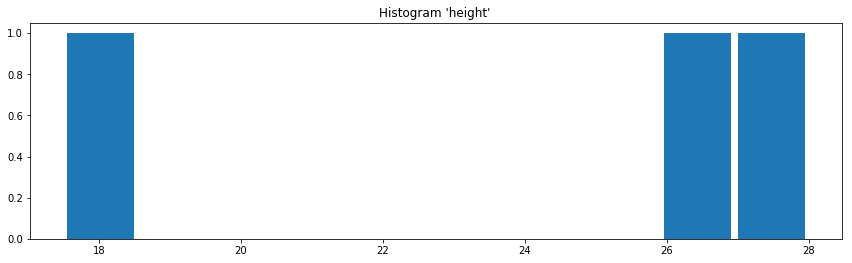

In [16]:
df.plot.hist("height",10)

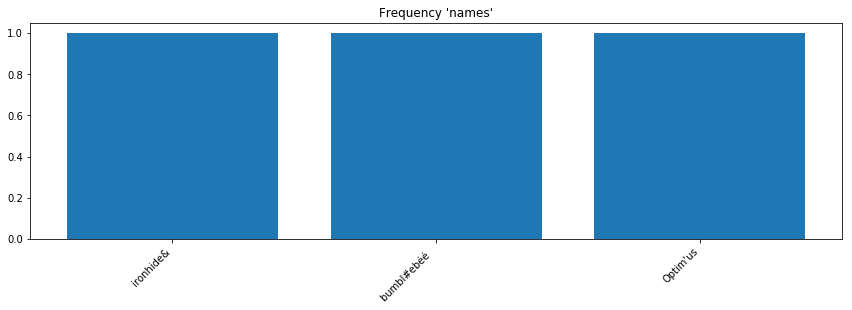

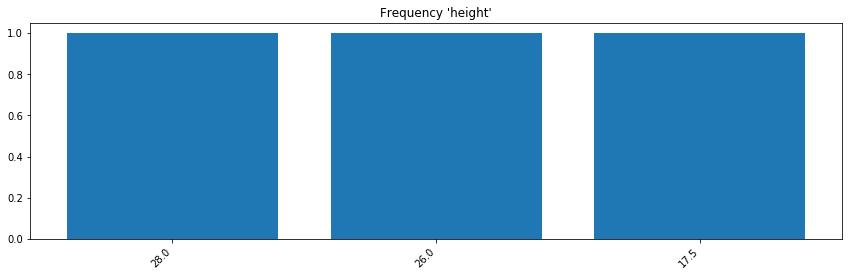

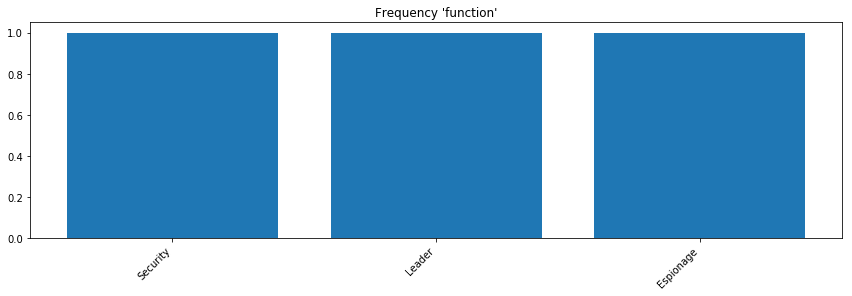

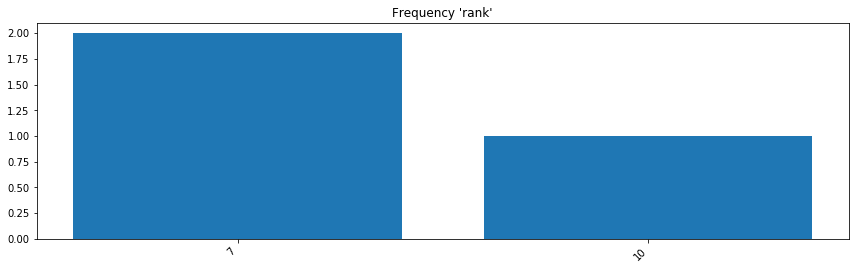

In [31]:
df.plot.frequency("*",10)

## Getting Data In/Out

In [32]:
df.cols.names()

['names', 'height', 'function', 'rank']

In [33]:
df.export()

'[(\'names\', StringType(), True),(\'height\', DoubleType(), True),(\'function\', StringType(), True),(\'rank\', LongType(), True)], [(\'bumbl#ebéé  \', 17.5, \'Espionage\', 7), ("Optim\'us", 28.0, \'Leader\', 10), (\'ironhide&\', 26.0, \'Security\', 7)]'

In [34]:
df.schema

StructType(List(StructField(names,StringType,true),StructField(height,DoubleType,true),StructField(function,StringType,true),StructField(rank,LongType,true)))

In [7]:
df.table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7


Processing column 'height'...
_count_data_types() executed in 1.11 sec
count_data_types() executed in 1.11 sec
cast_columns() executed in 0.0 sec
_exprs() executed in 1.18 sec
general_stats() executed in 1.19 sec
------------------------------
Processing column 'height'...
frequency() executed in 1.19 sec
stats_by_column() executed in 0.0 sec
percentile() executed in 0.04 sec
extra_numeric_stats() executed in 0.17 sec
bucketizer() executed in 0.19 sec
hist() executed in 1.38 sec
dataset_info() executed in 1.21 sec


Number of columns,4
Number of rows,3
Total Missing (%),0.0%
Total size in memory,81.7 MB
String,0
Numeric,1
Date,0
Bool,0
Array,0
Not available,0
Unique,3

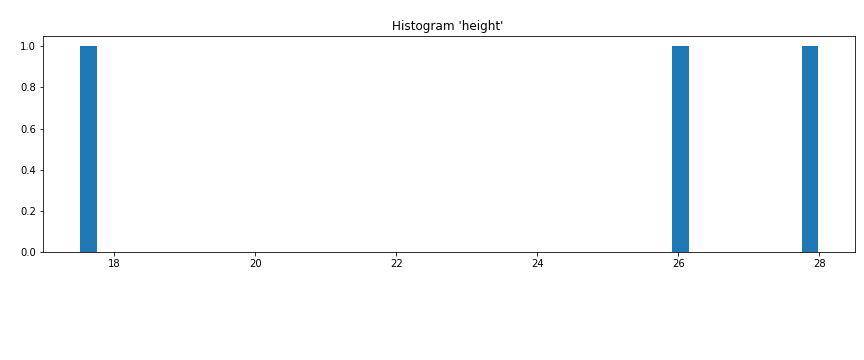
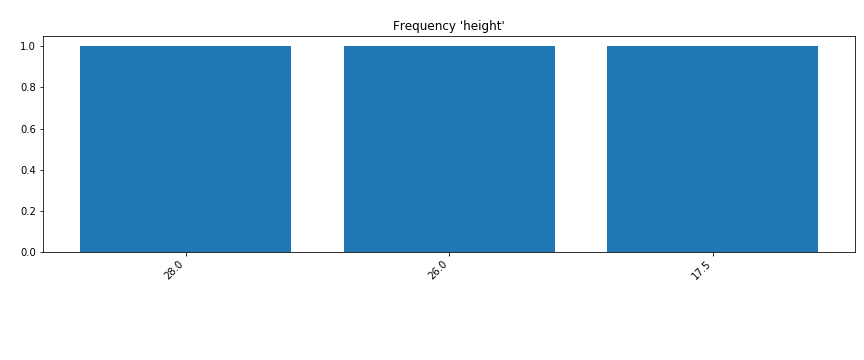

Pika version 0.12.0 connecting to ::1:5672
Created channel=1
Closing channel (0): 'Normal shutdown' on <Channel number=1 OPEN conn=<SelectConnection OPEN socket=('::1', 60968, 0, 0)->('::1', 5672, 0, 0) params=<URLParameters host=localhost port=5672 virtual_host=/ ssl=False>>>
Received <Channel.CloseOk> on <Channel number=1 CLOSING conn=<SelectConnection OPEN socket=('::1', 60968, 0, 0)->('::1', 5672, 0, 0) params=<URLParameters host=localhost port=5672 virtual_host=/ ssl=False>>>
run() executed in 8.76 sec


In [26]:
op.profiler.run(df, "height",infer=True)

In [34]:
df_csv =op.load.url("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.csv").limit(5)
df_csv.table()

Downloaded 967 bytes
Creating DataFrame for foo.csv. Please wait...
Successfully created DataFrame for 'foo.csv'


id 1 (int) nullable,firstName 2 (string) nullable,lastName 3 (string) nullable,billingId 4 (int) nullable,product 5 (string) nullable,price 6 (int) nullable,birth 7 (string) nullable,dummyCol 8 (string) nullable
1,Luis,Alvarez$$%!,123,Cake,10,1980/07/07,never
2,André,Ampère,423,piza,8,1950/07/08,gonna
3,NiELS,Böhr//((%%,551,pizza,8,1990/07/09,give
4,PAUL,dirac$,521,pizza,8,1954/07/10,you
5,Albert,Einstein,634,pizza,8,1990/07/11,up


In [35]:
df_json =op.load.url("https://raw.githubusercontent.com/ironmussa/Optimus/master/examples/data/foo.json", "json").limit(5)
df_json.table()

Downloaded 2596 bytes
Creating DataFrame for foo.json. Please wait...
Successfully created DataFrame for 'foo.json'


billingId 1 (bigint) nullable,birth 2 (string) nullable,dummyCol 3 (string) nullable,firstName 4 (string) nullable,id 5 (bigint) nullable,lastName 6 (string) nullable,price 7 (bigint) nullable,product 8 (string) nullable
123,1980/07/07,never,Luis,1,Alvarez$$%!,10,Cake
423,1950/07/08,gonna,André,2,Ampère,8,piza
551,1990/07/09,give,NiELS,3,Böhr//((%%,8,pizza
521,1954/07/10,you,PAUL,4,dirac$,8,pizza
634,1990/07/11,up,Albert,5,Einstein,8,pizza


In [ ]:
df_csv.save.csv("test.csv") 

In [13]:
df.table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7
Optim'us,28.0,Leader,10
ironhide&,26.0,Security,7


## Enrichment

In [14]:
import requests

def func_request(params):
    # You can use here whatever header or auth info you need to send. 
    # For more information see the requests library
    url= "https://jsonplaceholder.typicode.com/todos/" + str(params["rank"])

    return requests.get(url)

def func_response(response):
    # Here you can parse de response
    return response["title"]

df_result = op.enrich(df, func_request= func_request, func_response= func_response)

In [15]:
df_result.table()

names 1 (string) nullable,height 2 (double) nullable,function 3 (string) nullable,rank 4 (bigint) nullable,jazz_results 5 (string) nullable
bumbl#ebéé⸱⸱,17.5,Espionage,7,illo⸱expedita⸱consequatur⸱quia⸱in
Optim'us,28.0,Leader,10,illo⸱est⸱ratione⸱doloremque⸱quia⸱maiores⸱aut
ironhide&,26.0,Security,7,illo⸱expedita⸱consequatur⸱quia⸱in
